# Data exploration

In [5]:
import pandas as pd


df = pd.read_csv("data/data.csv")
df.head()

,chain_id,first_res,input,dssp8
0,4trtA,1,VMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLS...,CEEEEEEHHHHHHHHHHHHHHSCSCCSSTTTTEEEEEECSSEEEEE...
1,5g0mA,19,PVRVGLSVDASALGHTIPPDYTGLSYEQAQMANPNYFSGANTQLAG...,CEEEEEEEEEEEEEEEEPTTCCEEEEEGGGGGCTTTSSTTCHHHHH...
2,5l6mF,2,AYVLDTNVAIHLRDGDPEVTTRVTALNGAILLSIISRVELEGGVYR...,CEEECHHHHHHHHTTCHHHHHHHHHCCSCEEEEHHHHHHHHHHHTS...
3,1gytE,1,MEFSVKSGSPEKQRSACIVVGVFEPRRLSPIAEQLDKISDGYISAL...,CEEEEECCCGGGCCCSCEEEEEETTTEECHHHHHHHHHHTSHHHHH...
4,1h0hL,1,SKGFFVDTTRCTACRGCQVACKQWHGNPATPTENTGFHQNPPDFNF...,CEEEEEEGGGCCCCCHHHHHHHHHHTPPPCCCCCSSCSCCSSSCBT...


In [6]:
print("Number of data points: ", len(df))

Number of data points:  18731


In [7]:
secondary_structures = {"G": "310 helix", "H": "α-helix", "I": "π-helix", "E": "β-sheet", "B": "β-bridge", "T": "helix turn", "S": "bend", "C": "coil"}
amino_acid_key_to_name = {"A": "Alanine", "R": "Arginine", "N": "Asparagine", "D": "Aspartic acid", "C": "Cysteine", "Q": "Glutamine", "E": "Glutamic acid", "G": "Glycine", "H": "Histidine", "I": "Isoleucine", "L": "Leucine", "K": "Lysine", "M": "Methionine", "F": "Phenylalanine", "P": "Proline", "S": "Serine", "T": "Threonine", "W": "Tryptophan", "Y": "Tyrosine", "V": "Valine"}

df["Total secondary structures"] = df["dssp8"].apply(lambda x: len(x))

# Count the number of each secondary structure element in the dssp8 column for each row and store the counts in a new column.
for key in secondary_structures.keys():
    df[secondary_structures[key]] = df["dssp8"].apply(lambda x: x.count(key))

df.head()

,chain_id,first_res,input,dssp8,Total secondary structures,310 helix,α-helix,π-helix,β-sheet,β-bridge,helix turn,bend,coil
0,4trtA,1,VMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLS...,CEEEEEEHHHHHHHHHHHHHHSCSCCSSTTTTEEEEEECSSEEEEE...,361,20,65,0,154,1,25,34,53
1,5g0mA,19,PVRVGLSVDASALGHTIPPDYTGLSYEQAQMANPNYFSGANTQLAG...,CEEEEEEEEEEEEEEEEPTTCCEEEEEGGGGGCTTTSSTTCHHHHH...,457,21,115,0,132,2,56,40,79
2,5l6mF,2,AYVLDTNVAIHLRDGDPEVTTRVTALNGAILLSIISRVELEGGVYR...,CEEECHHHHHHHHTTCHHHHHHHHHCCSCEEEEHHHHHHHHHHHTS...,127,4,71,0,16,1,11,7,17
3,1gytE,1,MEFSVKSGSPEKQRSACIVVGVFEPRRLSPIAEQLDKISDGYISAL...,CEEEEECCCGGGCCCSCEEEEEETTTEECHHHHHHHHHHTSHHHHH...,503,30,174,0,100,0,59,38,95
4,1h0hL,1,SKGFFVDTTRCTACRGCQVACKQWHGNPATPTENTGFHQNPPDFNF...,CEEEEEEGGGCCCCCHHHHHHHHHHTPPPCCCCCSSCSCCSSSCBT...,214,8,52,0,46,2,31,22,50


In [110]:
print("--- Secondary structure basic statistics ---")
# total secondary structures mean, min, max, std, median, 25th percentile, 75th percentile    
print("Total secondary structures mean: ", df["Total secondary structures"].mean())
print("Total secondary structures min: ", df["Total secondary structures"].min())
print("Total secondary structures max: ", df["Total secondary structures"].max())
print("Total secondary structures std: ", df["Total secondary structures"].std())
print("Total secondary structures median: ", df["Total secondary structures"].median())
print("Total secondary structures 25th percentile: ", df["Total secondary structures"].quantile(0.25))
print("Total secondary structures 75th percentile: ", df["Total secondary structures"].quantile(0.75))

print("---")
# average number of each secondary structure
for key in secondary_structures.keys():
    print(secondary_structures[key], "mean: ", df[secondary_structures[key]].mean())


print("--- Input sequence basic statistics ---")
# length of input sequence mean, min, max, std, median, 25th percentile, 75th percentile
df["input_length"] = df["input"].apply(lambda x: len(x))
print("Length mean: ", df["input_length"].mean())
print("Length min: ", df["input_length"].min())
print("Length max: ", df["input_length"].max())
print("Length std: ", df["input_length"].std())
print("Length median: ", df["input_length"].median())
print("Length 25th percentile: ", df["input_length"].quantile(0.25))
print("Length 75th percentile: ", df["input_length"].quantile(0.75))

# most common amino acids in input
amino_acids = "ACDEFGHIKLMNPQRSTVWY"
for aa in amino_acids:
    print("Amino acid ", aa, " count: ", df["input"].apply(lambda x: x.count(aa)).sum())


print("--- Basic correlations between input and secondary sequences ---")
# correlation between length of input and number of secondary structures
print("Correlation between input length and total secondary structures: ", df["input_length"].corr(df["Total secondary structures"], method="pearson"))

# Count of amino acids and occurrence of each secondary structure kind
correlations = []
corrs = []
col = secondary_structures.keys()
indices = []
for aa in amino_acids:
    aa_corr = []
    indices.append(aa)
    for key in secondary_structures.keys():
        corr_secondary = df["input"].apply(lambda x: x.count(aa)).corr(df[secondary_structures[key]], method="pearson")
        aa_corr.append(corr_secondary)
        correlations.append((f"Correlation between amino acid {amino_acid_key_to_name[aa]} count and {secondary_structures[key]} count", corr_secondary))
    corrs.append(aa_corr)
correlations.sort(key=lambda x: x[1], reverse=True)

for desc, corr in correlations[:]:
    print(f"{desc}: {corr}")

--- Secondary structure basic statistics ---
Total secondary structures mean:  213.95841119000588
Total secondary structures min:  39
Total secondary structures max:  1723
Total secondary structures std:  145.53981051358716
Total secondary structures median:  172.0
Total secondary structures 25th percentile:  108.0
Total secondary structures 75th percentile:  286.0
---
310 helix mean:  7.623405050451124
α-helix mean:  70.62393892477711
π-helix mean:  1.1827985692168064
β-sheet mean:  45.718167743313224
β-bridge mean:  2.385884362820992
helix turn mean:  23.933852971010623
bend mean:  19.61235385190326
coil mean:  39.17030590998879
--- Input sequence basic statistics ---
Length mean:  213.95841119000588
Length min:  39
Length max:  1723
Length std:  145.53981051358716
Length median:  172.0
Length 25th percentile:  108.0
Length 75th percentile:  286.0
Amino acid  A  count:  330590
Amino acid  C  count:  38960
Amino acid  D  count:  235280
Amino acid  E  count:  275057
Amino acid  F  coun

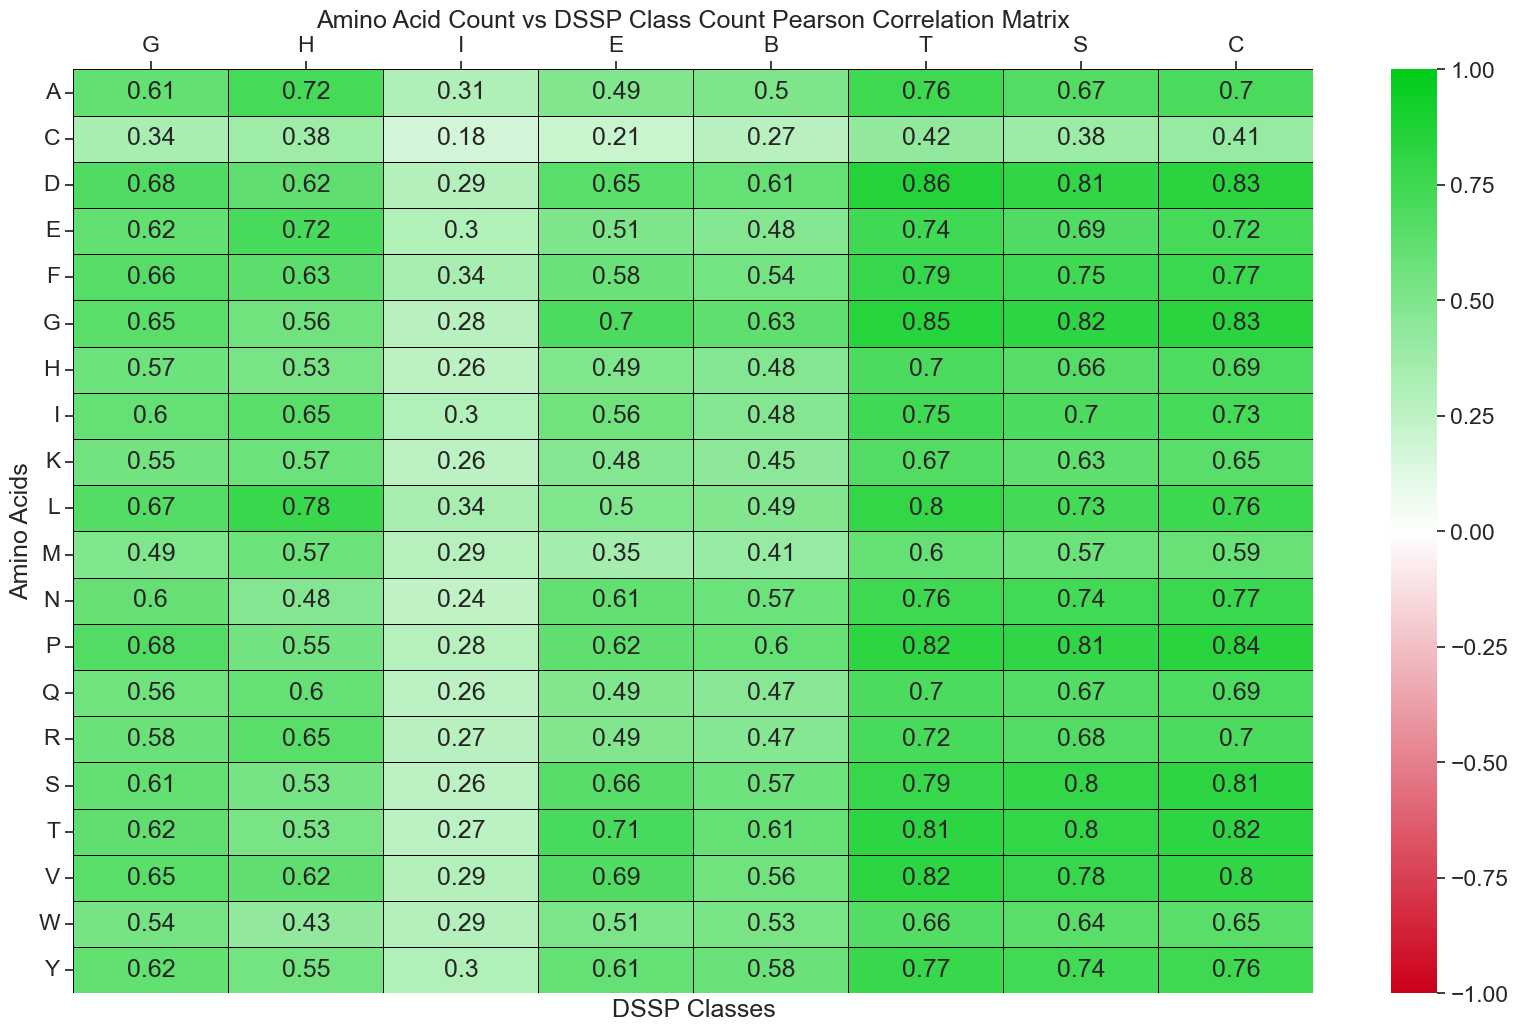

In [112]:
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np

cdict = {'red':  ((0.0, 0.7, 0.8),   
                  (0.5, 1.0, 1.0),   
                  (1.0, 0.0, 0.0)),  

        'green': ((0.0, 0.0, 0.0),   
                  (0.5, 1.0, 1.0),   
                  (1.0, 0.8, 0.8)),  

        'blue':  ((0.0, 0.1, 0.1),   
                  (0.5, 1.0, 1.0),   
                  (1.0, 0.1, 0.1))   
       }

GnRd = colors.LinearSegmentedColormap('GnRd', cdict)


corr_df = pd.DataFrame(data=corrs, columns=col, index=indices)

fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_df,  ax=ax, annot=True,  vmin=-1, vmax=1, linecolor='black', linewidths=0.5, cmap=GnRd)
ax.set_yticklabels(indices, rotation=0)
ax.yaxis.tick_left()
ax.xaxis.tick_top() 
ax.set_xlabel("DSSP Classes")
ax.set_ylabel("Amino Acids")
ax.set_title("Amino Acid Count vs DSSP Class Count Pearson Correlation Matrix")
ax.figure.savefig('aa-dssp-corr.png')

In [36]:
# NOTE: I am just adding stuff to the dataframe here for testing purposes. We don't want this for anything other than just peeking at the data. 
# Amino acid composition percentages rather than just counts
for aa in amino_acids:
    df[f"{amino_acid_key_to_name[aa]} percentage"] = df["input"].apply(lambda x: x.count(aa) / len(x) * 100)

# Percentage of each type of secondary structure
for key in secondary_structures.keys():
    df[f"{secondary_structures[key]} percentage"] = df[secondary_structures[key]] / df["Total secondary structures"] * 100


df

,chain_id,first_res,input,dssp8,Total secondary structures,310 helix,α-helix,π-helix,β-sheet,β-bridge,...,Tryptophan percentage,Tyrosine percentage,310 helix percentage,α-helix percentage,π-helix percentage,β-sheet percentage,β-bridge percentage,helix turn percentage,bend percentage,coil percentage
0,4trtA,1,VMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLS...,CEEEEEEHHHHHHHHHHHHHHSCSCCSSTTTTEEEEEECSSEEEEE...,361,20,65,0,154,1,...,0.000000,1.939058,5.540166,18.005540,0.0,42.659280,0.277008,6.925208,9.418283,14.681440
1,5g0mA,19,PVRVGLSVDASALGHTIPPDYTGLSYEQAQMANPNYFSGANTQLAG...,CEEEEEEEEEEEEEEEEPTTCCEEEEEGGGGGCTTTSSTTCHHHHH...,457,21,115,0,132,2,...,1.531729,4.376368,4.595186,25.164114,0.0,28.884026,0.437637,12.253829,8.752735,17.286652
2,5l6mF,2,AYVLDTNVAIHLRDGDPEVTTRVTALNGAILLSIISRVELEGGVYR...,CEEECHHHHHHHHTTCHHHHHHHHHCCSCEEEEHHHHHHHHHHHTS...,127,4,71,0,16,1,...,0.787402,3.149606,3.149606,55.905512,0.0,12.598425,0.787402,8.661417,5.511811,13.385827
3,1gytE,1,MEFSVKSGSPEKQRSACIVVGVFEPRRLSPIAEQLDKISDGYISAL...,CEEEEECCCGGGCCCSCEEEEEETTTEECHHHHHHHHHHTSHHHHH...,503,30,174,0,100,0,...,0.795229,2.783300,5.964215,34.592445,0.0,19.880716,0.000000,11.729622,7.554672,18.886680
4,1h0hL,1,SKGFFVDTTRCTACRGCQVACKQWHGNPATPTENTGFHQNPPDFNF...,CEEEEEEGGGCCCCCHHHHHHHHHHTPPPCCCCCSSCSCCSSSCBT...,214,8,52,0,46,2,...,0.934579,2.803738,3.738318,24.299065,0.0,21.495327,0.934579,14.485981,10.280374,23.364486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18726,5iyxA,21,LNQDATILRQAKLGLSDPAQSLSSWSDNNDVTPaKWLGVSaDATSN...,CHHHHHHHHHHHHTSBCTTCTTTTTTSCTTCCGGGSTTEEECTTSC...,596,84,20,0,137,4,...,1.006711,1.510067,14.093960,3.355705,0.0,22.986577,0.671141,12.751678,12.248322,26.677852
18727,2lvcA,1,HMPVHIVDPREHVFVHAITSECVMLACEVDREDAPVRWYKDGQEVE...,CCCCCCCBCCSCEEEECCTTCCEEEEEECSCTTSCCEEEETTSCCC...,90,3,0,0,37,1,...,1.111111,2.222222,3.333333,0.000000,0.0,41.111111,1.111111,8.888889,12.222222,33.333333
18728,4h51B,7,MTTAERWQKIQAQAPDVIFDLAKRAAAAKGPKANLVIGAYRDEQGR...,CCHHHHHHTPPPPPPPHHHHHHHHHHHCCSSCEECCSCCCBCTTSC...,403,13,184,0,54,2,...,1.488834,4.466501,3.225806,45.657568,0.0,13.399504,0.496278,11.662531,6.451613,15.880893
18729,1xu6A,354,GSHMLEVLTQKHKPAESQQQAAETEGSaNKKDQNEbKSPaKWHNDA...,CCCSCCCSCCSSCSCCSSCCCCCCHHHHHHSCTTTCCTTSCEETTS...,80,0,14,0,4,0,...,1.250000,0.000000,0.000000,17.500000,0.0,5.000000,0.000000,10.000000,27.500000,40.000000


In [40]:
# keep where pi-helix count is greater than 0
df_pi_helix = df[df["π-helix"] > 0]
print(len(df_pi_helix)) 
print(len(df)) 

3275
18731
